# Population Dynamics
Flora Hess (flora.hess@stud.uni-heidelberg.de)<br/>Leonardo K. Reiter (leonardo.reiter@stud.uni-heidelberg.de)<br/>Jason G. Jun (jun.jasongabriel@stud.uni-heidelberg.de)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as P
from scipy.integrate import odeint
%matplotlib inline

plt.rcParams["figure.figsize"] = 14, 8
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.facecolor"] = (0.2, 0.2, 0.2)
plt.rcParams["axes.edgecolor"] = (1.0, 1.0, 1.0)
plt.rcParams["grid.color"] = (0.6, 0.6, 0.6)
plt.rcParams["grid.linestyle"] = (3, 1)
plt.rcParams["legend.facecolor"]= (1.0, 1.0, 1.0)
plt.rcParams["font.family"] = "serif"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["xtick.labeltop"] = False
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.labelleft"] = True
plt.rcParams["ytick.left"] = True
# print(plt.rcParams.key())

In this exercise we study the following equation for population dynamics:
$$\frac{dN}{dt} = rN\left(1-\frac{N}{K}\right)-\frac{BN^2}{A^2+N^2},$$
where all parameters $r$, $K$, $A$ and $B$ are positive. It is a more complex example, in which the growth behaviour depends on whether N is smaller or larger than a critical populations size $A$.

## Task 1: Dimensional analyis
Determine the dimension of the parameters and rewrite the equation in dimensionless form. Note that there are different possibilities. Please formulate a dimensionless time $\tau$ that is _not_ defined on the basis of $r$. Use $n = \frac{N}{A}$ as the dimensionless version of $N$.

\begin{eqnarray}
[N] = 1,\ [t] = T &\Rightarrow& [A] = 1,\  [K] = 1,\  [r] = T^{-1},\  [B] = T^{-1}\\
\frac{dN}{dt} &=& rN\left(1-\frac{N}{K}\right)-\frac{BN^2}{A^2+N^2}\quad\Big|\ :B\quad\Big|\ n = \frac{N}{A}, k = \frac{K}{A}, \rho = \frac{A}{B}r, \tau = \frac{B}{A}t\\
\Rightarrow\frac{dn}{d\tau} &=& \rho n\left(1-\frac{n}{k}\right)-\frac{n^2}{1+n^2}
\end{eqnarray}

## Task 2: Stationary Points
Determine the stationary points $n^*$ for $\frac{K}{A} = 7.7$. Note that for $n^* \neq 0$ these values are solutions of a cubic equation; it depends on $n$ and the remaining free parameter. The cubic equation should be derived by yourself analytically; its zero points you can obtain numerically / graphically by using e.g. Mathematica. When do one or three real solutions exist as a function of the remaining free parameter? (Hint: we do not ask for some analytical formula here! It is enough to vary the free parameter and check which three solutions for the stationary points you get; as stationary points only real solutions are valid. Only one digit after the comma is enough, in other words you vary the free parameter by about 0.05.). Which of the stationary points is stable and unstable?

For stationary points, the neccessary condition is $\frac{dn}{d\tau} = 0$, from which we deduce:<br><br>
\begin{eqnarray}
0 &\overset{!}{=}& \frac{dn}{d\tau} = \rho n\left(1-\frac{n}{k}\right)-\frac{n^2}{1+n^2} = n\left(\rho\left(1-\frac{n}{k}\right)-\frac{n}{1+n^2}\right)\\
\Rightarrow n=0 \quad\lor\quad 0 &=& \rho\left(1-\frac{n}{k}\right)-\frac{n}{1+n^2}\quad\Big|\ \cdot k(1+n^2)\\
0 &=& \rho k+\rho kn^2-(\rho+k) n-\rho n^3
\end{eqnarray}<br>
Thus the stationary points $n^*$ are $n^* = 0$ and the roots of the cubic equation above.
Using an algorithm, we find the limiting values for the free parameter $\rho$, which still result in three real solutions.

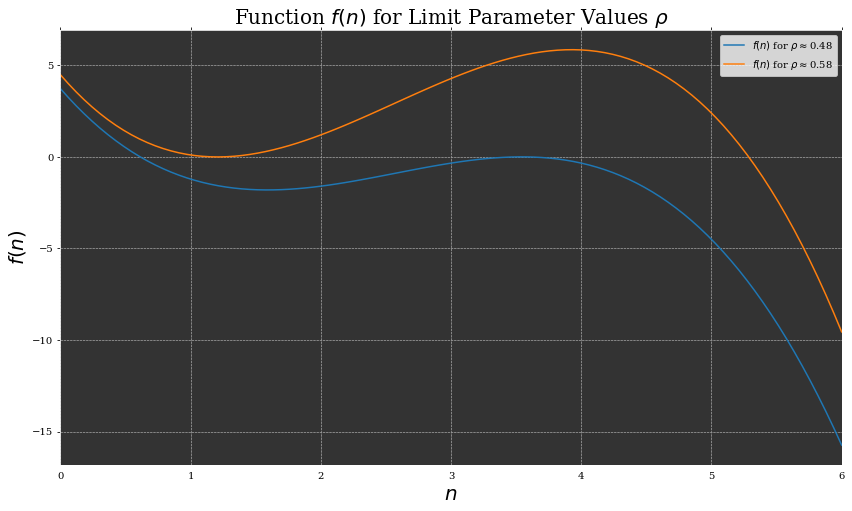

In [6]:
def cubic(r, k=7.7):
    return P.Polynomial([r*k, -(r+k), r*k, -r])


def find_roots(r, cubic):
    roots = cubic(r).roots()
    return roots[np.isreal(roots)].real


def plot_r_lims(r_lims, cubic):
    r_min, r_max = r_lims
    n_min, n_max = 0, np.ceil(max(find_roots(r_max, cubic)))
    n_range = np.linspace(n_min, n_max ,100)
    y = np.array([cubic(r)(n_range) for r in r_lims]).T
    labels = [r"$f(n)$ for $\rho \approx$"+f"{r:.02f}" for r in r_lims]
    ylim = abs(max(y.flatten(), key=abs))
    plt.plot(n_range, y)
    plt.title(r"Function $f(n)$ for Limit Parameter Values $\rho$")
    plt.ylabel(r"$f(n)$")
    plt.xlabel(r"$n$")
    plt.xlim(n_min, n_max)
    plt.legend(labels)
    plt.show()
    pass


def find_r_lims(cubic, plot=True):
    r, step, r_min, r_max = 0, 1e-4, None, None
    while r_max is None:
        roots = find_roots(r, cubic)
        r_min = r if r_min is None and len(roots) != 1 else r_min
        r_max = r - step if r_min is not None and len(roots) == 1 else r_max
        r += step
    r_lims = r_min, r_max
    if plot:
        plot_r_lims(r_lims, cubic)
    return r_lims


r_lims = find_r_lims(cubic)

The stability of the fixed or stationary points can be determined by evaluating the derivative $f'(n)$ of the differential function $f(n):=\frac{dn}{d\tau}$. A fixed point $n^*$ is locally stable, if $f'(n^*) < 0$. We randomly select a value for the free parameter $\rho$ within the limiting values and demonstrate a stability analysis for the given parameter $\rho$ and the corrosponding fixed points $n^*$.

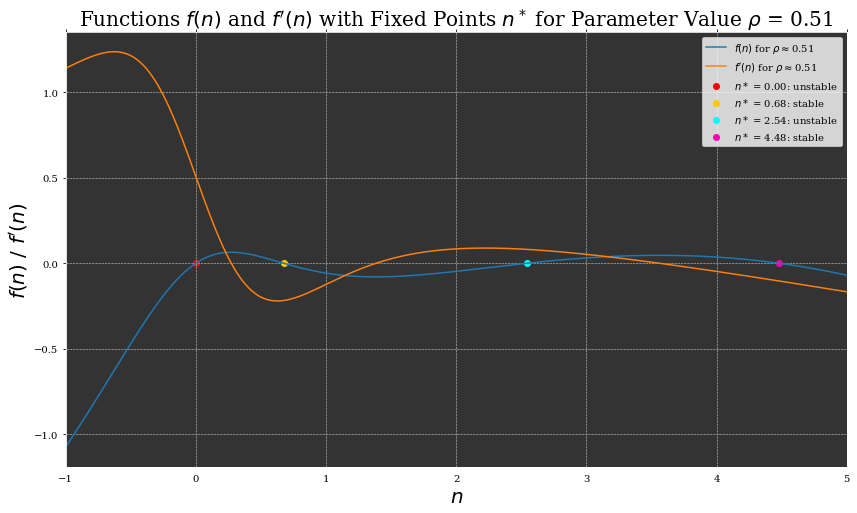

In [7]:
def fixed_points(r_lims, cubic):
    r = np.random.uniform(*r_lims)
    trivial, roots = [0], find_roots(r, cubic)
    return r, np.concatenate((trivial, roots))


def dndt(n, t, r, k=7.7):
    return r * n * (1 - n / k) - n**2 / (1 + n**2)


def dndt_(n, r, k=7.7):
    return r - 2 * n * (r / k + 1 / (1 + n**2)**2)


def plot_stability(r, n_FP, cubic, dndt_):
    n_min, n_max = np.floor(min(n_FP)-.1), np.ceil(max(n_FP))
    n_range = np.linspace(n_min, n_max ,1000)
    for n in n_FP:
        color = plt.cm.get_cmap("hsv")(n/5)
        stab = "stable" if dndt_(n, r) < 0 else "unstable"
        plt.scatter(n, 0, label=r"$n*$ = "+f"{n:.02f}: {stab}", color=color)
    plt.plot(n_range, dndt(n_range, 0, r), label = r"$f(n)$ for $\rho \approx$"+f"{r:.02f}")
    plt.plot(n_range, dndt_(n_range, r), label = r"$f'(n)$ for $\rho \approx$"+f"{r:.02f}")
    plt.title(r"Functions $f(n)$ and $f'(n)$ with Fixed Points $n^*$ for Parameter Value $\rho$ = "+f"{r:.02f}")
    plt.ylabel(r"$f(n)\ /\ f'(n)$")
    plt.xlabel(r"$n$")
    plt.xlim(n_min, n_max)
    plt.legend()
    plt.show()
    pass

r, n_FP = fixed_points(r_lims, cubic)
plot_stability(r, n_FP, cubic, dndt_)

As a quick practical check, we numerically integrate the differential equation to actually see the development of the population for the fixed points with a slight disturbance.<br> As can be seen, the values that were previously determined to be unstable fixed points quickly diverge from the supposed fixed point value and converge to the value of the nearest stable fixed point value, confirming and validating our analysis.

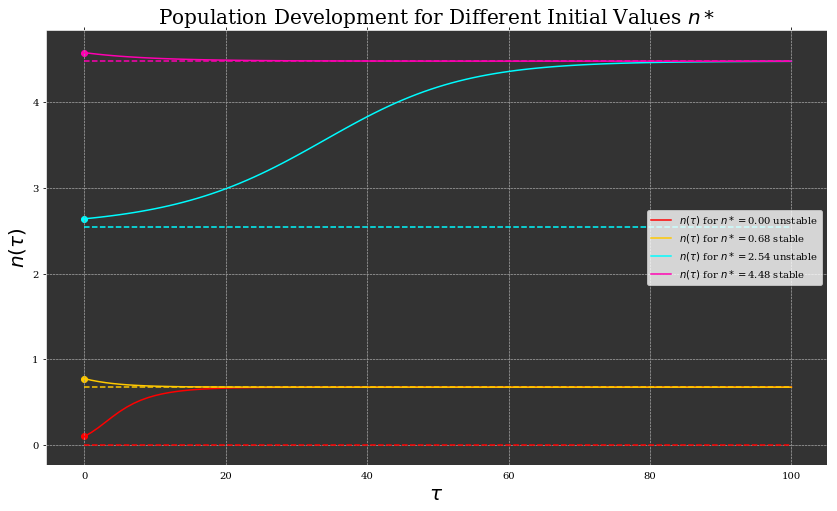

In [8]:
def plot_development(r, n_FP, dndt, dndt_):
    t_max = 100
    t = np.linspace(0, t_max, t_max+1)
    for n in n_FP:
        color = plt.cm.get_cmap("hsv")(n/5)
        stability = "stable" if dndt_(n, r) < 0 else "unstable"
        population = odeint(dndt, n+.1, t, args=(r,)).T[0]
        static = np.full(population.shape, n)
        plt.scatter(t[0], population[0], color=color)
        plt.plot(t, population, label=r"$n(\tau)$ for $n* = $"+f"{n:.02f} "+f"{stability}", c=color)
        plt.plot(t, static, ls="--", c=color)
    plt.title(r"Population Development for Different Initial Values $n*$")
    plt.ylabel(r"$n(\tau)$")
    plt.xlabel(r"$\tau$")
    plt.legend()
    plt.show()
    pass

plot_development(r, n_FP, dndt, dndt_)